### CIFAR-10 and CIFAR-100 Image Classification Datasets

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

#!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 50.6 MB/s eta 0:00:00


### Check Runtime Resources





In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Apr 11 01:46:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


### CIFAR-10: Import and pre-process data

In [4]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

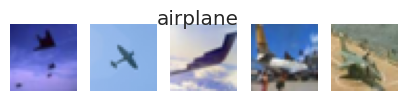

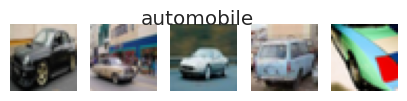

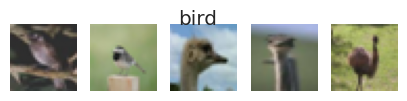

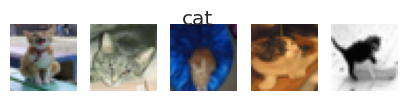

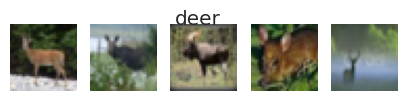

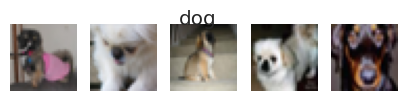

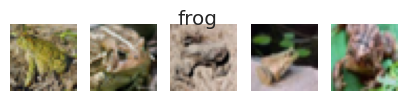

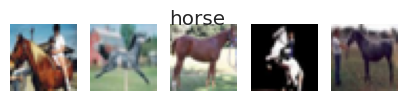

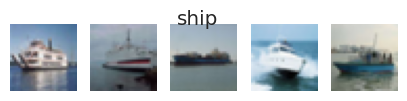

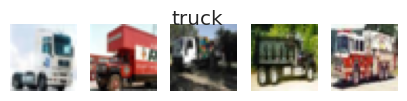

In [7]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

#### Build FeedFwd Neural Network Model
Create a placeholder function for building a neural net

In [8]:
def build_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [9]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)
print(model.summary())

Epoch 1/10
704/704 [==============================] - 9s 3ms/step - loss: 1.9627 - accuracy: 0.3227 - val_loss: 1.7884 - val_accuracy: 0.3626
Epoch 2/10
704/704 [==============================] - 2s 3ms/step - loss: 1.7037 - accuracy: 0.3935 - val_loss: 1.7710 - val_accuracy: 0.3628
Epoch 3/10
704/704 [==============================] - 2s 3ms/step - loss: 1.6185 - accuracy: 0.4246 - val_loss: 1.6334 - val_accuracy: 0.4234
Epoch 4/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5732 - accuracy: 0.4403 - val_loss: 1.6030 - val_accuracy: 0.4284
Epoch 5/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5323 - accuracy: 0.4581 - val_loss: 1.5965 - val_accuracy: 0.4374
Epoch 6/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5017 - accuracy: 0.4679 - val_loss: 1.5557 - val_accuracy: 0.4598
Epoch 7/10
704/704 [==============================] - 2s 3ms/step - loss: 1.4801 - accuracy: 0.4729 - val_loss: 1.5569 - val_accuracy: 0.4578
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.962675,0.322667,1.788401,0.3626
1,1.703667,0.393533,1.770985,0.3628
2,1.618498,0.424622,1.633357,0.4234
3,1.573221,0.440333,1.603028,0.4284
4,1.532295,0.458133,1.596543,0.4374
5,1.501671,0.467867,1.555690,0.4598
6,1.480103,0.472867,1.556891,0.4578
7,1.455029,0.482333,1.507813,0.4764
8,1.434783,0.489222,1.564883,0.4556
9,1.419646,0.496667,1.507071,0.4738


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
None


### Plot FNN Model Training & Validation Accuracy

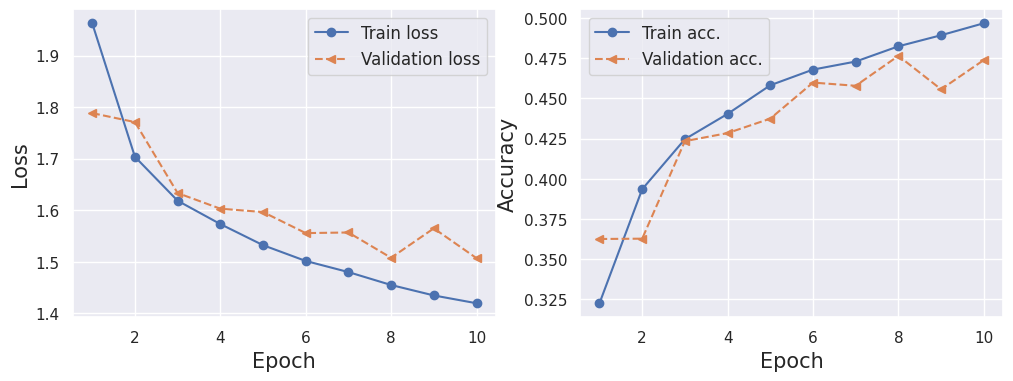

In [10]:
hist = history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [11]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4828 - accuracy: 0.4726

Test Acc. 47.26%


### Build CNN Model

In [12]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [13]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, #increase training size
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 9s 4ms/step - loss: 1.5829 - accuracy: 0.4209 - val_loss: 1.3502 - val_accuracy: 0.5158
Epoch 2/15
704/704 [==============================] - 3s 4ms/step - loss: 1.2766 - accuracy: 0.5418 - val_loss: 1.2826 - val_accuracy: 0.5396
Epoch 3/15
704/704 [==============================] - 3s 4ms/step - loss: 1.1359 - accuracy: 0.5970 - val_loss: 1.2093 - val_accuracy: 0.5730
Epoch 4/15
704/704 [==============================] - 3s 4ms/step - loss: 1.0267 - accuracy: 0.6383 - val_loss: 1.0452 - val_accuracy: 0.6328
Epoch 5/15
704/704 [==============================] - 3s 4ms/step - loss: 0.9360 - accuracy: 0.6700 - val_loss: 0.9901 - val_accuracy: 0.6614
Epoch 6/15
704/704 [==============================] - 3s 4ms/step - loss: 0.8678 - accuracy: 0.6961 - val_loss: 0.9991 - val_accuracy: 0.6560
Epoch 7/15
704/704 [==============================] - 3s 4ms/step - loss: 0.8005 - accuracy: 0.7190 - val_loss: 1.0019 - val_accuracy: 0.6524
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.582862,0.420867,1.350191,0.5158
1,1.276636,0.541756,1.282553,0.5396
2,1.135935,0.597000,1.209302,0.5730
3,1.026664,0.638333,1.045164,0.6328
4,0.935999,0.669956,0.990058,0.6614
5,0.867756,0.696089,0.999119,0.6560
6,0.800494,0.719000,1.001868,0.6524
7,0.732098,0.741689,0.883558,0.7006
8,0.682825,0.757711,0.929330,0.6878
9,0.637201,0.775044,0.917842,0.6936


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy

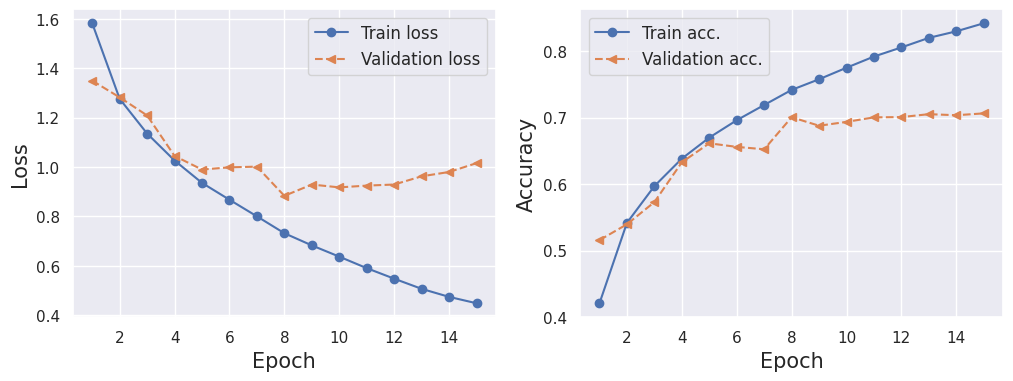

In [14]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [15]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.0116 - accuracy: 0.7093

Test Acc. 70.93%


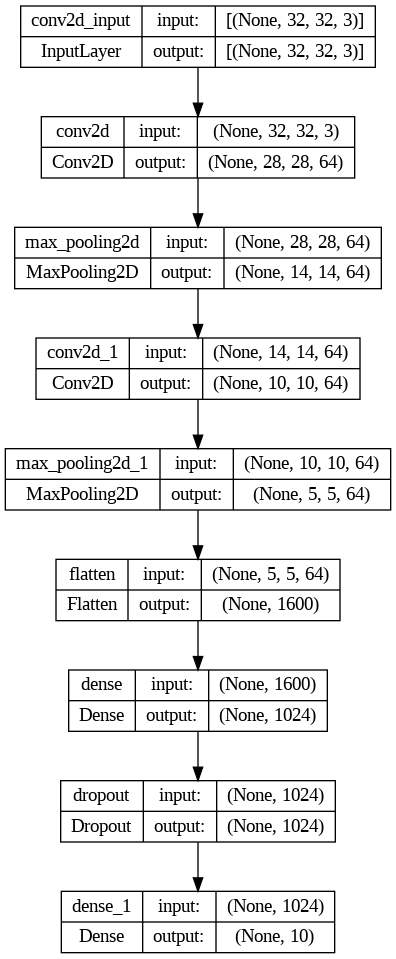

In [16]:
plot_model(model, show_shapes=True, show_layer_names=True)

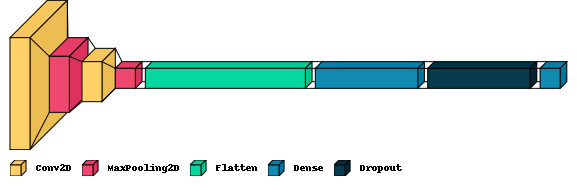

In [17]:
visualkeras.layered_view(model, legend=True)

### Build CNN Model #2

In [18]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  #double-up on convolutions and add dropouts for each layer
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [19]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 7s 6ms/step - loss: 1.6580 - accuracy: 0.3859 - val_loss: 1.4285 - val_accuracy: 0.4828
Epoch 2/15
704/704 [==============================] - 3s 5ms/step - loss: 1.3109 - accuracy: 0.5258 - val_loss: 1.1530 - val_accuracy: 0.5920
Epoch 3/15
704/704 [==============================] - 3s 5ms/step - loss: 1.1479 - accuracy: 0.5943 - val_loss: 0.9913 - val_accuracy: 0.6512
Epoch 4/15
704/704 [==============================] - 3s 5ms/step - loss: 1.0355 - accuracy: 0.6316 - val_loss: 0.9366 - val_accuracy: 0.6686
Epoch 5/15
704/704 [==============================] - 3s 5ms/step - loss: 0.9535 - accuracy: 0.6648 - val_loss: 0.8885 - val_accuracy: 0.6890
Epoch 6/15
704/704 [==============================] - 3s 5ms/step - loss: 0.8798 - accuracy: 0.6885 - val_loss: 0.8597 - val_accuracy: 0.7016
Epoch 7/15
704/704 [==============================] - 3s 5ms/step - loss: 0.8384 - accuracy: 0.7070 - val_loss: 0.8163 - val_accuracy: 0.7168
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.657966,0.385911,1.428506,0.4828
1,1.310940,0.525800,1.153037,0.5920
2,1.147917,0.594311,0.991297,0.6512
3,1.035528,0.631578,0.936591,0.6686
4,0.953514,0.664844,0.888516,0.6890
5,0.879812,0.688489,0.859672,0.7016
6,0.838443,0.707000,0.816253,0.7168
7,0.787277,0.723600,0.761496,0.7352
8,0.756679,0.736067,0.766294,0.7418
9,0.710095,0.749111,0.778105,0.7322


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                        

### Plot CNN Model 2 Training & Validation Accuracy

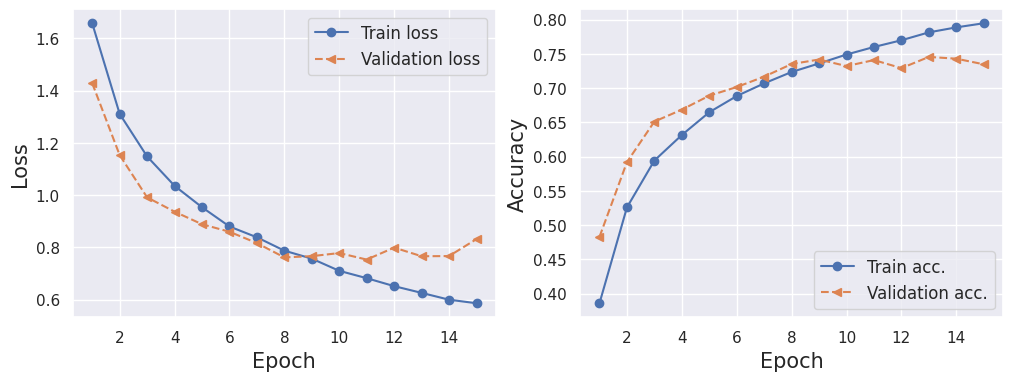

In [20]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [21]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.8359 - accuracy: 0.7332

Test Acc. 73.32%


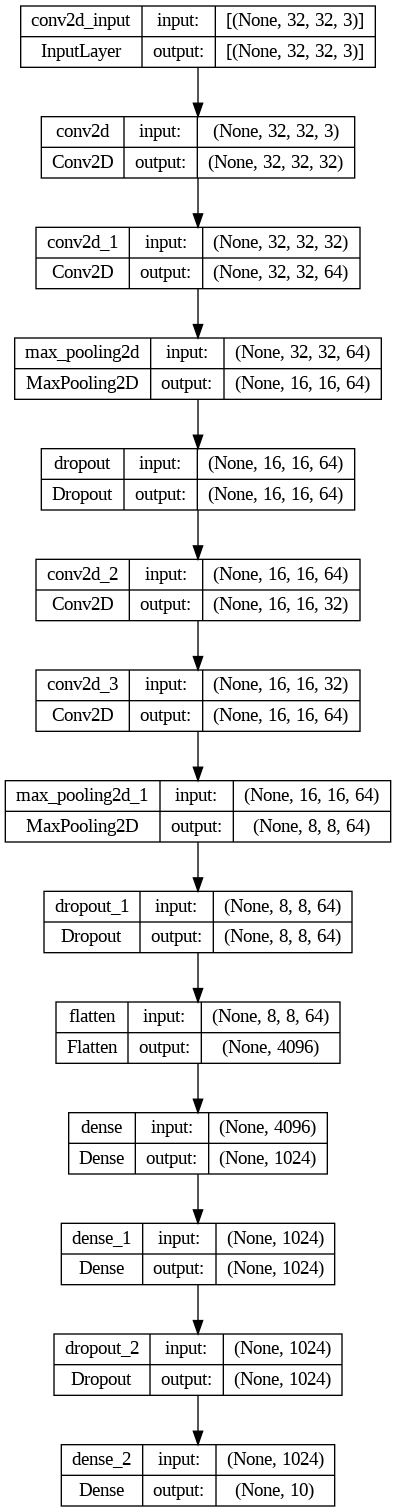

In [22]:
plot_model(model, show_shapes=True, show_layer_names=True)

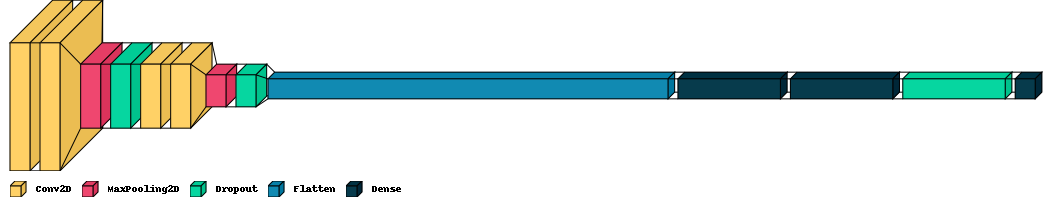

In [23]:
visualkeras.layered_view(model, legend=True)

### Build CNN Model 3 With Batch Normalization

In [24]:
def build_cnn_model_3(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [25]:
model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 12s 9ms/step - loss: 1.6216 - accuracy: 0.4374 - val_loss: 1.6969 - val_accuracy: 0.4348
Epoch 2/15
704/704 [==============================] - 6s 8ms/step - loss: 1.0858 - accuracy: 0.6205 - val_loss: 0.9798 - val_accuracy: 0.6668
Epoch 3/15
704/704 [==============================] - 6s 8ms/step - loss: 0.8715 - accuracy: 0.7036 - val_loss: 0.9127 - val_accuracy: 0.6840
Epoch 4/15
704/704 [==============================] - 6s 8ms/step - loss: 0.7512 - accuracy: 0.7474 - val_loss: 0.7733 - val_accuracy: 0.7380
Epoch 5/15
704/704 [==============================] - 6s 8ms/step - loss: 0.6541 - accuracy: 0.7803 - val_loss: 0.6626 - val_accuracy: 0.7834
Epoch 6/15
704/704 [==============================] - 6s 8ms/step - loss: 0.5922 - accuracy: 0.8025 - val_loss: 0.8029 - val_accuracy: 0.7522
Epoch 7/15
704/704 [==============================] - 6s 8ms/step - loss: 0.5283 - accuracy: 0.8218 - val_loss: 0.6707 - val_accuracy: 0.7918
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.621638,0.437422,1.696943,0.4348
1,1.085783,0.620467,0.979802,0.6668
2,0.871513,0.703600,0.912651,0.6840
3,0.751159,0.747378,0.773262,0.7380
4,0.654143,0.780311,0.662608,0.7834
5,0.592196,0.802467,0.802927,0.7522
6,0.528335,0.821844,0.670732,0.7918
7,0.467909,0.841867,0.626543,0.8078
8,0.420205,0.858889,0.671253,0.7918
9,0.378121,0.875178,0.601998,0.8132


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

### Plot CNN Model 3 & Test Accuracy

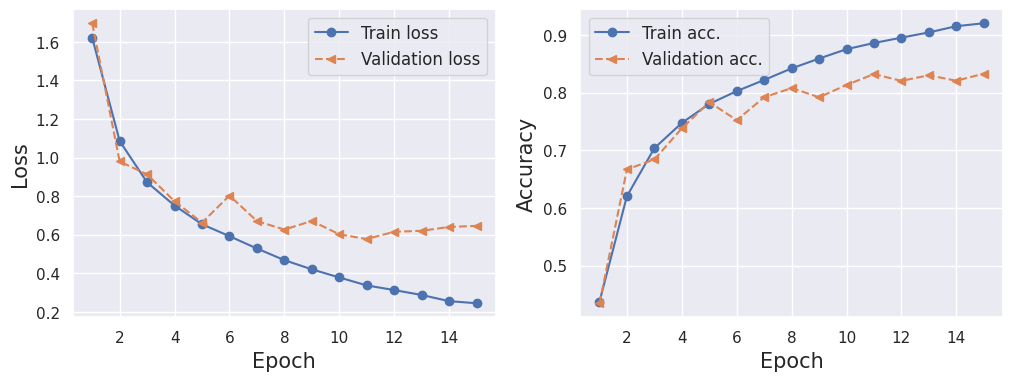

In [26]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [27]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.6452 - accuracy: 0.8310

Test Acc. 83.10%


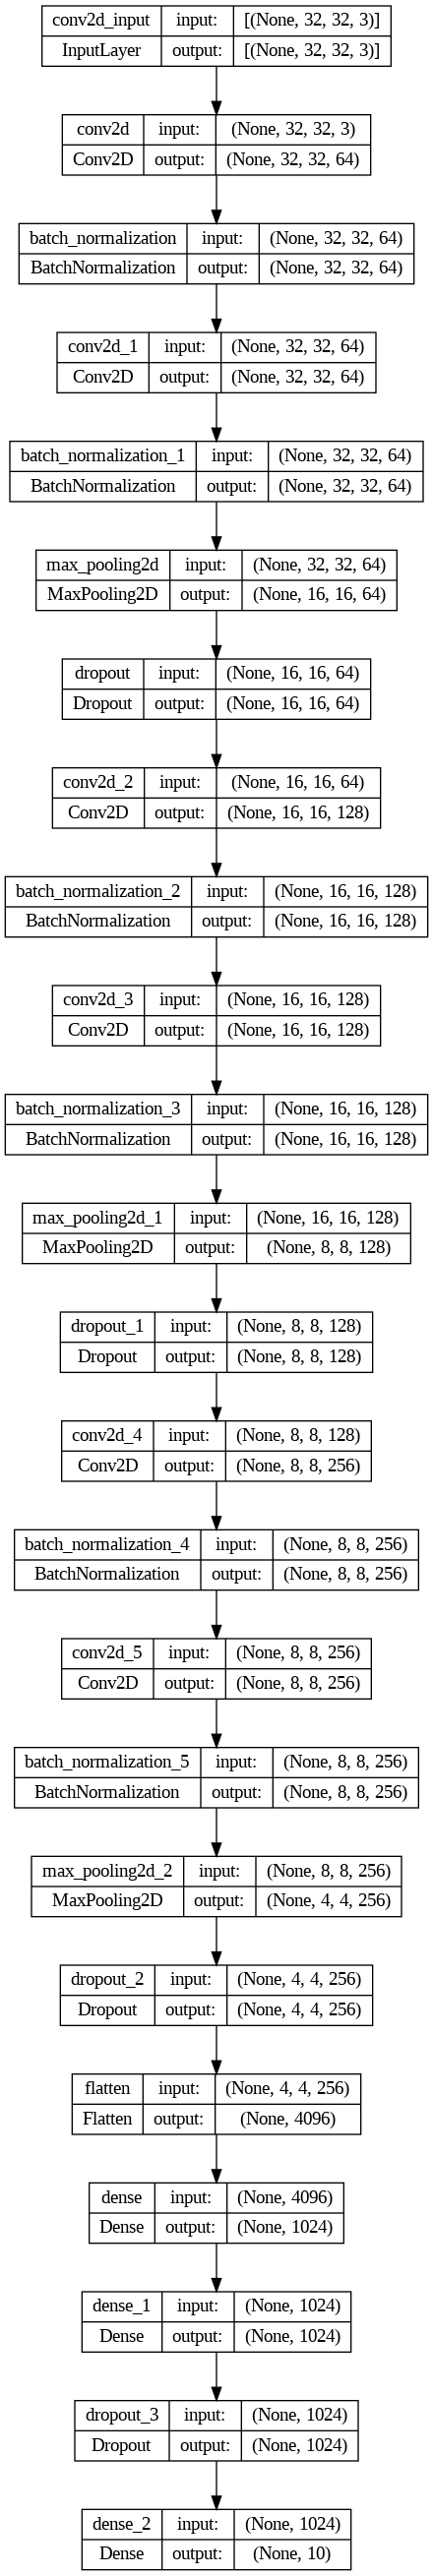

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

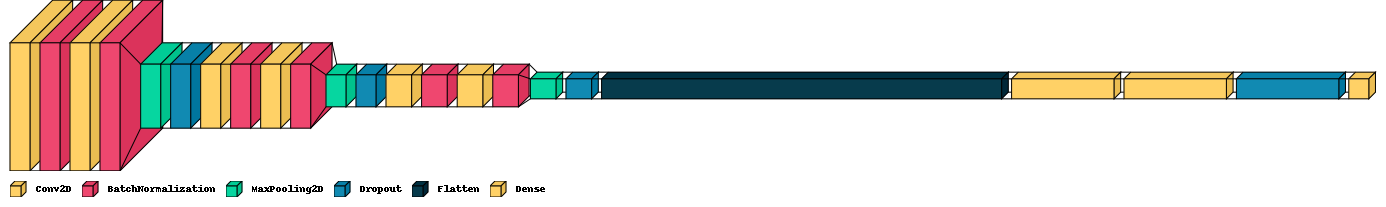

In [29]:
visualkeras.layered_view(model, legend=True)

### Evaluate CNN Model 3 Precision and Accuracy Metrics by Label

In [30]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 1 ... 5 1 7]


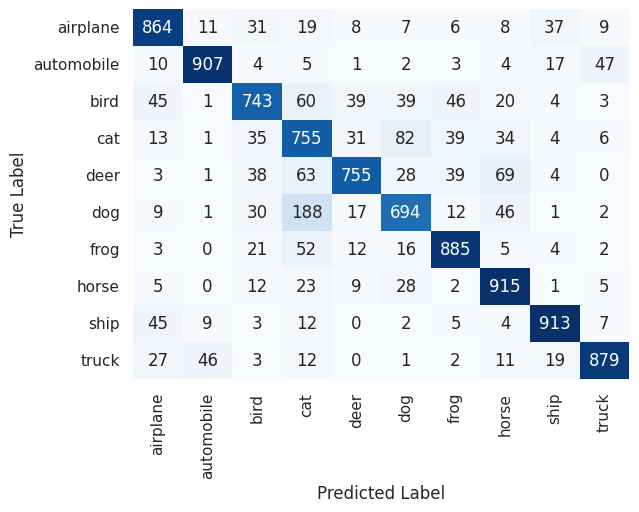

In [31]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [32]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.84375, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9283520982599796, shape=(), dtype=float64)
bird 	 tf.Tensor(0.8076086956521739, shape=(), dtype=float64)
cat 	 tf.Tensor(0.6349873843566022, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8658256880733946, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7719688542825361, shape=(), dtype=float64)
frog 	 tf.Tensor(0.8517805582290664, shape=(), dtype=float64)
horse 	 tf.Tensor(0.8198924731182796, shape=(), dtype=float64)
ship 	 tf.Tensor(0.9093625498007968, shape=(), dtype=float64)
truck 	 tf.Tensor(0.915625, shape=(), dtype=float64)


label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 



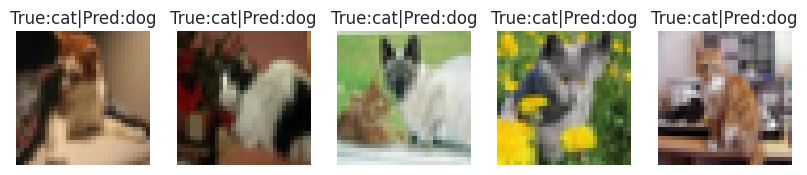

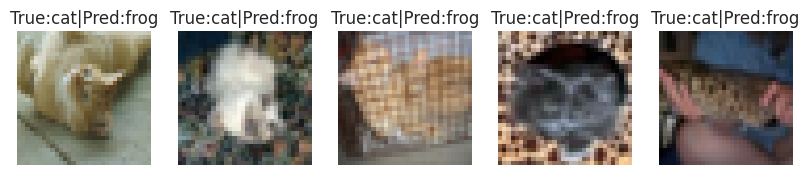

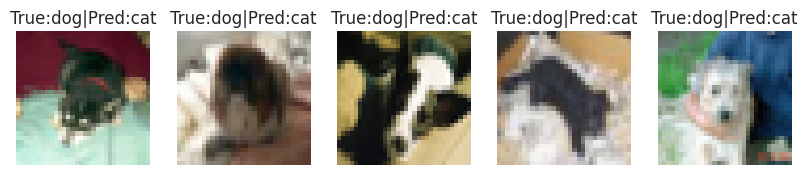

In [33]:
print("label names:", label_names,"\n")
x_test_1 = x_test[np.logical_and(y_test==3, test_predictions==5)] #true label = 'cat', predicted label = 'dog'
x_test_2 = x_test[np.logical_and(y_test==3, test_predictions==6)] #true label = 'cat', predicted label = 'frog'
x_test_3 = x_test[np.logical_and(y_test==5, test_predictions==3)] #true label = 'dog', predicted label = 'cat'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_1[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[5])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_2[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[6])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_3[i], cmap='gray')
  axs[i].set_title("True:" + label_names[5] + "|Pred:" + label_names[3])
  axs[i].axis('off')
plt.show()

### Import ResNet50, Run on CIFAR-10, and Evaluate

In [34]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [35]:
def preprocess_image_input(input):
  input = input.astype('float32')
  output = tf.keras.applications.resnet50.preprocess_input(input)
  return output

In [36]:
X_train = preprocess_image_input(x_train)
X_test = preprocess_image_input(x_test)

print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")

X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)


In [37]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    #x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

'''
Since input image size is (32 x 32), first upsample the image by factor of (7x7) to transform it to (224 x 224)
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='Adam', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = define_compile_model()

model.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                              

In [38]:
history = model.fit(
  x = x_train,
  y = y_train,
  epochs=5, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose = 1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/5
704/704 [==============================] - 111s 101ms/step - loss: 0.7371 - accuracy: 0.7494 - val_loss: 2.2278 - val_accuracy: 0.2822
Epoch 2/5
704/704 [==============================] - 69s 98ms/step - loss: 0.4093 - accuracy: 0.8597 - val_loss: 0.5083 - val_accuracy: 0.8262
Epoch 3/5
704/704 [==============================] - 69s 98ms/step - loss: 0.2971 - accuracy: 0.8968 - val_loss: 0.6536 - val_accuracy: 0.7838
Epoch 4/5
704/704 [==============================] - 69s 98ms/step - loss: 0.2229 - accuracy: 0.9220 - val_loss: 0.7009 - val_accuracy: 0.7806
Epoch 5/5
704/704 [==============================] - 69s 98ms/step - loss: 0.1728 - accuracy: 0.9391 - val_loss: 0.5242 - val_accuracy: 0.8418


,loss,accuracy,val_loss,val_accuracy
0,0.737137,0.749400,2.227841,0.2822
1,0.409264,0.859733,0.508341,0.8262
2,0.297118,0.896800,0.653620,0.7838
3,0.222857,0.922022,0.700851,0.7806
4,0.172813,0.939067,0.524241,0.8418


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              209817

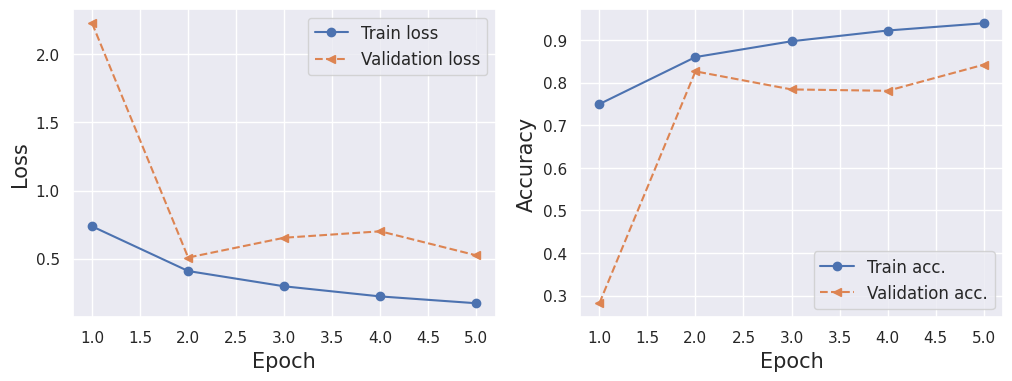

In [39]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [40]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 5s 15ms/step - loss: 0.5521 - accuracy: 0.8400

Test Acc. 84.00%


In [41]:
#plot_model(model, show_shapes=True, show_layer_names=True)

In [42]:
#visualkeras.layered_view(model, legend=True)

In [43]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 5s 12ms/step
[3 8 8 ... 5 1 7]


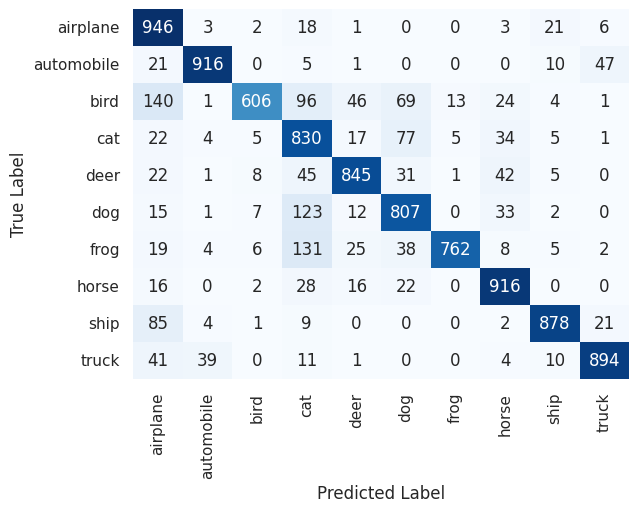

In [44]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [45]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.7128862094951017, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9414182939362795, shape=(), dtype=float64)
bird 	 tf.Tensor(0.9513343799058085, shape=(), dtype=float64)
cat 	 tf.Tensor(0.6404320987654321, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8765560165975104, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7729885057471264, shape=(), dtype=float64)
frog 	 tf.Tensor(0.9756722151088348, shape=(), dtype=float64)
horse 	 tf.Tensor(0.8592870544090057, shape=(), dtype=float64)
ship 	 tf.Tensor(0.9340425531914893, shape=(), dtype=float64)
truck 	 tf.Tensor(0.9197530864197531, shape=(), dtype=float64)


### Incorporate Pre-Processing and Run CNN Model 3



In [46]:
IMAGE_SIZE = (32, 32)
CONTRAST_FACTOR = 1
DELTA = 0.3

def preprocess_data(x_train, x_test):
    """ apply transformaions and augmentations
    
    Params:
    -------
    images  (np.ndarray): Images of shape (N, 224, 224, 3)
    y (np.ndarray): Labels of shape (N,)   
    split (tuple): 3 values summing to 1 defining split of train, validation and test sets
    
    Returns:
    --------
    X_train (np.ndarray): Train images of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)
    
    """
    
    ### create train/validation/test sets ###
    #########################################
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    tf.random.set_seed(1234)
    np.random.seed(1234)

    ### image transformation on training, validation, and test data ###
    ###################################################################
    # image resize
    X_train = tf.image.resize(x_train, size=IMAGE_SIZE)
    X_test = tf.image.resize(x_test, size=IMAGE_SIZE)
    
    
    ### image augmentation on training data ###
    ###########################################
    # adjust brightness
    X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)
    
    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)
    
    # concatenate original X_train and augmented X_train data
    #X_train = tf.concat([X_train, X_train_augm],axis=0)
    
    # concatenate y_train (note the label is preserved)
    #y_train_augm = y_train
    #y_train = tf.concat([y_train, y_train_augm],axis=0)
    
    # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
    #shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    #X_train = tf.gather(X_train, shuffle)
    #y_train = tf.gather(y_train, shuffle).numpy() #also transforms y_train to numpy array
    
    return X_train_augm, X_test

In [47]:
X_train, X_test = preprocess_data(x_train, x_test)

print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")

X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)


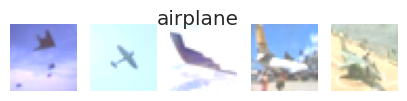

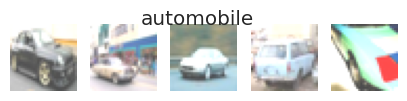

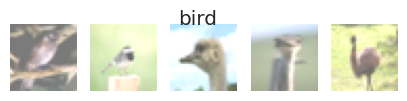

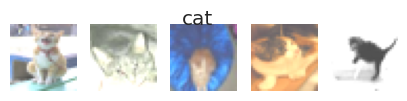

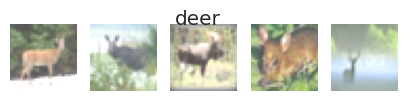

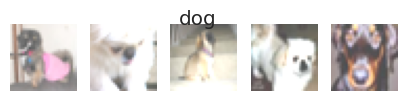

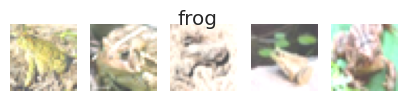

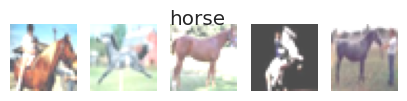

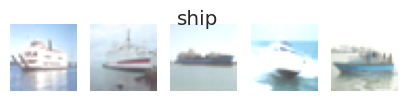

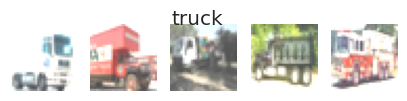

In [48]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = X_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()